In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [12]:
data = pd.read_csv("C:/Users/withy/바탕화면/KUBIG/24-2 데이터분석 스터디/7주차/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking the target classes

Text(0, 0.5, 'Frequency')

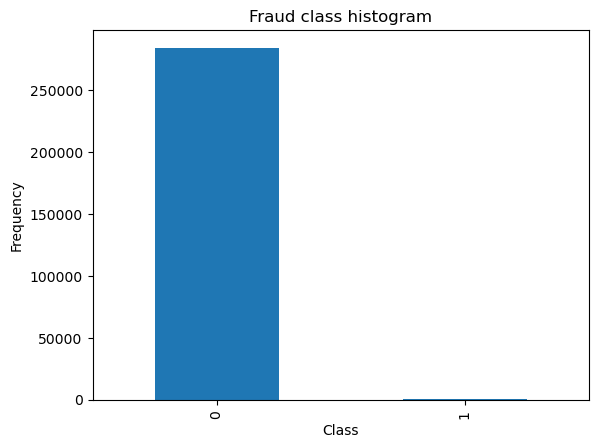

In [14]:
# class 열 count 
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

Class 불균형 확인. 1에 대한 예측이 어렵다

1. 혼동행렬 (진양성/진음성/위양성/위음성)
2. 데이터 resampling (oversampling/undersampling)
   데이터가 적을 때는 소수 클래스 비율을 늘리는 oversampling이 유리,
   데이터가 많은 때는 다수 클래스 일부를 제거하는 undersampling이 유리
3. 로지스틱 회귀 테스트
4. 다른 모델로 확장 (의사결정 트리, 랜덤포레스트, XGBoost 등)

In [23]:
from sklearn.preprocessing import StandardScaler

# Amount 열 표준화 (평균이 0 , 분산이 1) / 2차원 배열로 변환하여 fit_trainsform, 새로운 열로 만듦 
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [29]:
# 독립변수 X와 종속변수 y 분리
X=data.iloc[:,data.columns != 'Class']
y=data.iloc[:,data.columns == 'Class']

In [33]:
# 데이터 불균형 해결 undersampling 
# 사기거래를 정상거래와 무작위로 결합하여 under_sample_indices에 저장 후 X,y로 분리 
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

normal_indices = data[data.Class == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 정상 거래/사기 거래 비율과 총 거래 수 출력 
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [43]:
# train/ test dataset 분할 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of trainsactions: ", len(X_train)+len(X_test))

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,y_undersample,test_size = 0.3,random_state = 0)

print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of trainsactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [63]:
# KFold 교차 검증을 사용하여 로지스틱 회귀 모델의 성능 평가, 최적의 정규화 매개변수를 찾는 함수 
def printing_Kfold_scores(x_train_data,y_train_data):
    #fold = KFold(len(y_train_data),5,shuffle=False) # 데이터를 섞지 않고 순서대로 5개의 폴드로 나눈다 
    fold = KFold(n_splits=5,shuffle=False)
    c_param_range = [0.01,0.1,1,10,100] # 로지스틱 회귀 모델의 정규화 매개변수 값 설정

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    j = 0
    
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1): # 각 폴드에 대해 반복하여 모델 훈련, 예측
            lr = LogisticRegression(C = c_param, penalty = 'l1')
            lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)
            recall_acc = recall_score(y_train_data.iloc[indicies[1],:].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration', iteration, ': recall score = ', recall_accs) # 각 반복마다 리콜점수 출력
            j+=1
            print('')
            print('Mean recall score', np.mean(recall_accs))
            print('')
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter'] 
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c # 가장 recall 점수 높은 C 출력

In [77]:
# KFold 교차 검증을 사용하여 로지스틱 회귀 모델의 성능 평가, 최적의 정규화 매개변수를 찾는 함수 
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(n_splits=5, shuffle=False)  # 5개의 폴드로 나누기

    c_param_range = [0.01, 0.1, 1, 10, 100]  # 로지스틱 회귀 모델의 정규화 매개변수 값 설정

    # 결과 테이블 초기화
    results_table = pd.DataFrame(columns=['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, (train_indices, test_indices) in enumerate(fold.split(x_train_data), start=1):  # 각 폴드에 대해 반복
            lr = LogisticRegression(C=c_param, penalty='l1', solver='liblinear')  # solver 추가
            lr.fit(x_train_data.iloc[train_indices, :], y_train_data.iloc[train_indices].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[test_indices, :].values)
            recall_acc = recall_score(y_train_data.iloc[test_indices].values, y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration', iteration, ': recall score = ', recall_acc)  # 각 반복마다 리콜 점수 출력

        mean_recall = np.mean(recall_accs)
        results_table.loc[results_table['C_parameter'] == c_param, 'Mean recall score'] = mean_recall
        print('Mean recall score', mean_recall)
        print('')

    # Mean recall score 열을 float 타입으로 변환
    results_table['Mean recall score'] = pd.to_numeric(results_table['Mean recall score'], errors='coerce')

    # 가장 높은 Mean recall score에 해당하는 C_parameter 찾기
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter'] 
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c  # 가장 recall 점수 높은 C 출력

In [79]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration 1 : recall score =  0.9315068493150684
Iteration 2 : recall score =  0.9178082191780822
Iteration 3 : recall score =  1.0
Iteration 4 : recall score =  0.972972972972973
Iteration 5 : recall score =  0.9545454545454546
Mean recall score 0.9553666992023157

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration 1 : recall score =  0.8493150684931506
Iteration 2 : recall score =  0.863013698630137
Iteration 3 : recall score =  0.9661016949152542
Iteration 4 : recall score =  0.9459459459459459
Iteration 5 : recall score =  0.9090909090909091
Mean recall score 0.9066934634150794

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration 1 : recall score =  0.863013698630137
Iteration 2 : recall score =  0.8767123287671232
Iteration 3 : recall score =  0.96

C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X d

Iteration 3 : recall score =  0.9830508474576272
Iteration 4 : recall score =  0.9459459459459459
Iteration 5 : recall score =  0.9090909090909091
Mean recall score 0.9155627459783485

-------------------------------------------
C parameter:  100
-------------------------------------------

Iteration 1 : recall score =  0.863013698630137
Iteration 2 : recall score =  0.8767123287671232


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 3 : recall score =  0.9830508474576272
Iteration 4 : recall score =  0.9459459459459459
Iteration 5 : recall score =  0.9090909090909091
Mean recall score 0.9155627459783485

*********************************************************************************
Best model to choose from cross validation is with C parameter =  0.01
*********************************************************************************


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [81]:
import itertools
# 혼동행렬을 시각화하는 함수 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    if normalize: # 정규화가 이루어진 경우에 혼동행렬 계산 
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # thresh 값 설정, 임계값보다 큰 경우 흰색, 아닌 경우 검정색으로 시시
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset:  0.9387755102040817
Confusion matrix, without normalization
[[132  17]
 [  9 138]]


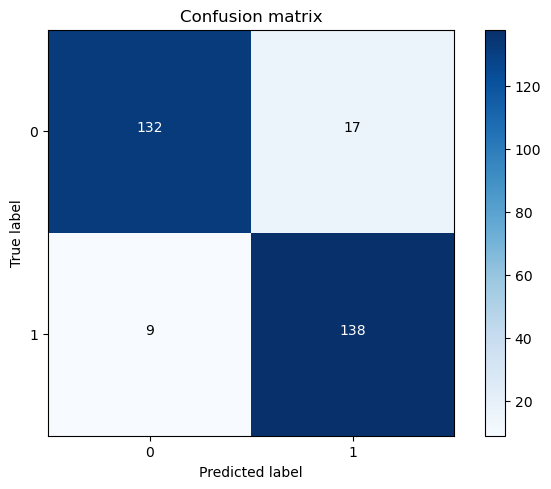

In [85]:
# 로지스틱 회귀 모델로 분류 작업 수행, 성능평가 
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear') 
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values) # 학습된 모델로 테스트데이터에 대한 예측 수행

# 실제 레이블과 예측 레이블의 비교, 재현율 계산(양성 샘플 중에서 모델이 옳게 예측한 비율)
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 혼동 행렬 시각화
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset:  0.9183673469387755
Confusion matrix, without normalization
[[75480  9816]
 [   12   135]]


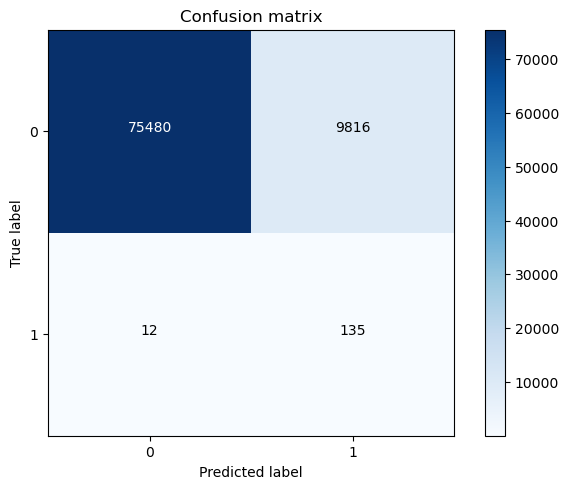

In [89]:
# undersampling하지 않은, 전체 테스트 데이터셋에 대한 분류 작업 수행 
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


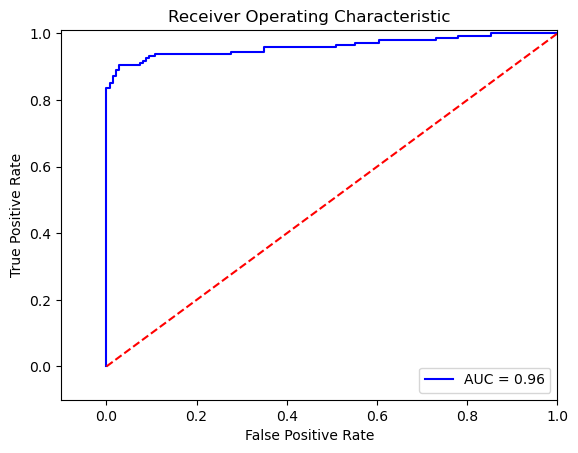

In [93]:
#ROC 곡선, AUC 계산. 
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

#ROC 계산을 위한 fpr(false positive rate), tpr(true positive rate), thresholds 
fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
# ROC 곡선 아래 면적 계
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------



C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 1 : recall score =  0.4925373134328358


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 2 : recall score =  0.6027397260273972


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 3 : recall score =  0.6833333333333333


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 4 : recall score =  0.5692307692307692


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 5 : recall score =  0.45
Mean recall score 0.5595682284048672

-------------------------------------------
C parameter:  0.1
-------------------------------------------



C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 1 : recall score =  0.5671641791044776


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 2 : recall score =  0.6164383561643836


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 3 : recall score =  0.6833333333333333


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 4 : recall score =  0.5846153846153846


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 5 : recall score =  0.525
Mean recall score 0.5953102506435158

-------------------------------------------
C parameter:  1
-------------------------------------------



C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 1 : recall score =  0.5522388059701493


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 2 : recall score =  0.6164383561643836


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 3 : recall score =  0.7166666666666667


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 4 : recall score =  0.6153846153846154


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 5 : recall score =  0.5625
Mean recall score 0.612645688837163

-------------------------------------------
C parameter:  10
-------------------------------------------



C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 1 : recall score =  0.5522388059701493


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 2 : recall score =  0.6164383561643836


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 3 : recall score =  0.7333333333333333


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 4 : recall score =  0.6153846153846154


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 5 : recall score =  0.575
Mean recall score 0.6184790221704963

-------------------------------------------
C parameter:  100
-------------------------------------------



C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 1 : recall score =  0.5522388059701493


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 2 : recall score =  0.6164383561643836


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 3 : recall score =  0.7333333333333333


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Iteration 4 : recall score =  0.6153846153846154
Iteration 5 : recall score =  0.575
Mean recall score 0.6184790221704963

*********************************************************************************
Best model to choose from cross validation is with C parameter =  10.0
*********************************************************************************


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset:  0.6190476190476191
Confusion matrix, without normalization
[[85284    12]
 [   56    91]]


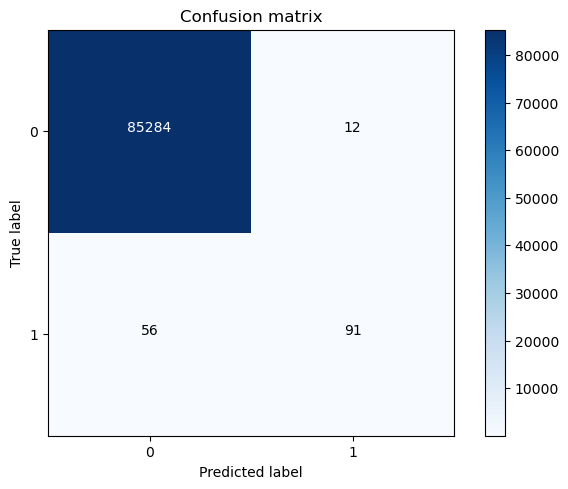

In [98]:
#전체 데이터셋에서 모델 훈련, 실제 레이블과 예측된 레이블 비교하여 혼동 행렬 생성
lr = LogisticRegression(C = best_c, penalty = 'l1', solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Recall metric in the testing dataset:  1.0
Confusion matrix, without normalization
[[  0 149]
 [  0 147]]
Recall metric in the testing dataset:  1.0
Confusion matrix, without normalization
[[  0 149]
 [  0 147]]
Recall metric in the testing dataset:  1.0
Confusion matrix, without normalization
[[  2 147]
 [  0 147]]


C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the testing dataset:  0.9795918367346939
Confusion matrix, without normalization
[[ 53  96]
 [  3 144]]


C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the testing dataset:  0.9387755102040817
Confusion matrix, without normalization
[[132  17]
 [  9 138]]


C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the testing dataset:  0.8843537414965986
Confusion matrix, without normalization
[[146   3]
 [ 17 130]]


C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the testing dataset:  0.8367346938775511
Confusion matrix, without normalization
[[148   1]
 [ 24 123]]


C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the testing dataset:  0.7619047619047619
Confusion matrix, without normalization
[[149   0]
 [ 35 112]]


C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Recall metric in the testing dataset:  0.5714285714285714
Confusion matrix, without normalization
[[149   0]
 [ 63  84]]


C:\Users\withy\AppData\Local\Temp\ipykernel_19060\2563930771.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


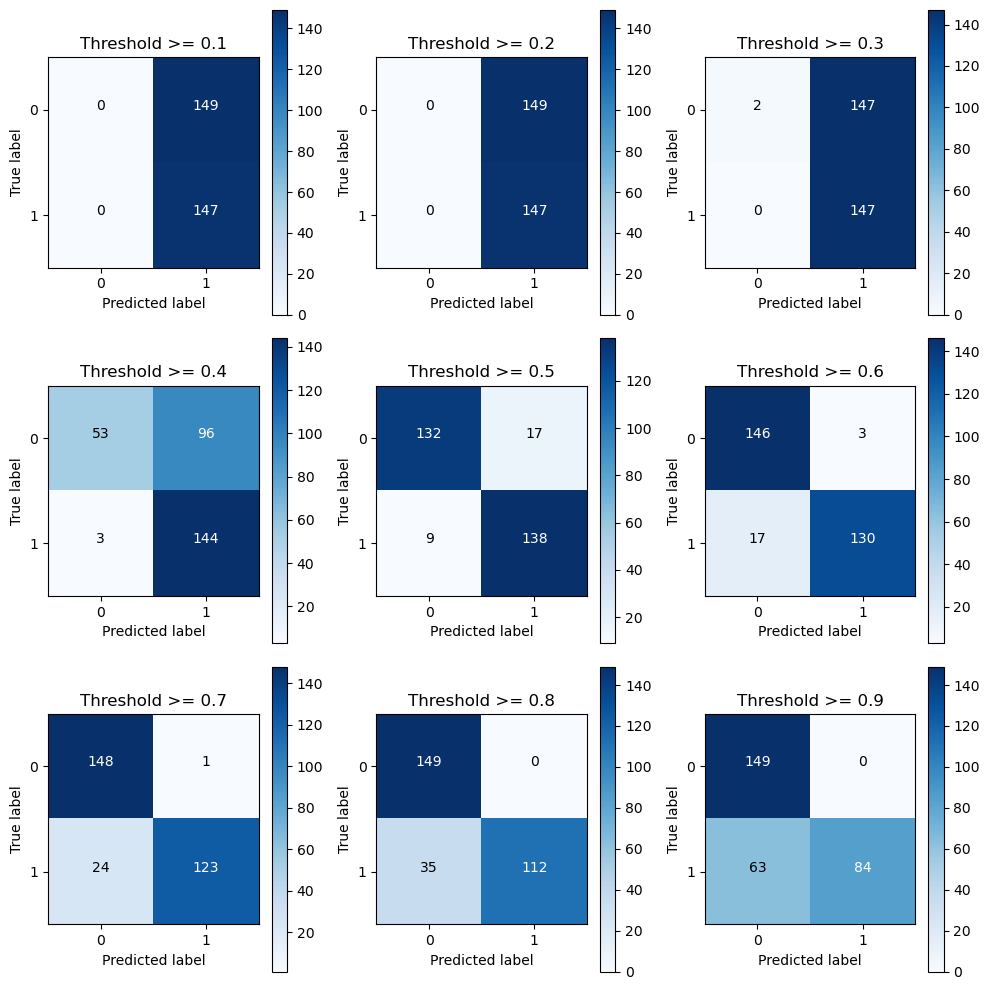

In [100]:
# undersampling된 데이터로 모델 학습 
# 재현율을 최적화하기 위한 임계값의 영향 관찰
lr = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel()) # ravel() : 1차원 배열로 변환하는 함수 
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # 임계값 설정하여 예측 수행 

plt.figure(figsize=(10,10)) 

j = 1
for i in thresholds: # 각 임계값에 대해 subplot 생성, 혼동행렬 계산 
    # 양성 클래스에 대한 확률 > 임계값 i보다 큰 경우 양성으로 예측 
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i 
    
    plt.subplot(3,3,j)
    j += 1

    #혼동행렬 계산, 재현율 출력 
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1] # 0: 음성 클래스 / 1 : 양성 클스스
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 

1로 예측하기 위한 임계값을 낮출수록 모두 1로 예측된다 (재현율 증가)
but, 정밀도는 감소 
어떻게 임계값을 잘 결정하냐. Precision-Recall 곡선을 시각적으로 확인하여 수동으로 결정해야한다

C:\Users\withy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


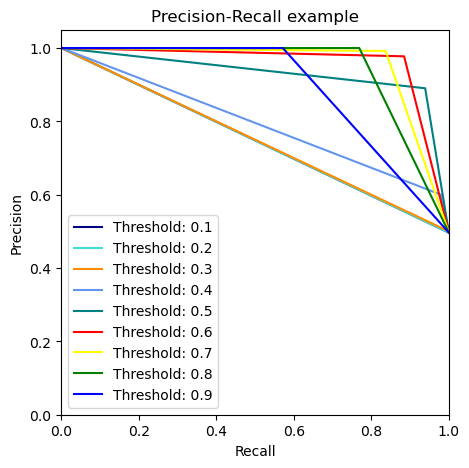

In [105]:
# 임계값 설정에 대한 Precision - Recall 곡선 시각화 
# undersampling된 데이터로 모델 학습 
from itertools import cycle

lr = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

# 양성클래스에 대한 확률 > 임계값i 인 경우 양성으로 예측, 정밀도/ 재현율 / 임계값 반환 
j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")